# Sample variance experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Define sample variance calculations

In [3]:
def nVar(n,nmean):
    
    dr2mean = 0
    
    myexp = np.random.normal(size=(nmean,n))
    
    for iexp in range(nmean):
        mean = np.mean(myexp[iexp])
        dr2 = (myexp[iexp]-mean)**2
        dr2mean += np.sum(dr2)/nmean

    return dr2mean

### (3) Run variance calculation

In [4]:
# Number of tries for mean calculation

Ntry = 1000

# Range for variance calculation

Nmin = 2
Nmax = 30
Nval = Nmax-Nmin+1

# Main loop

n_tab = np.empty(Nval,dtype=double)
dr2_tab = np.empty(Nval,dtype=double)

for n in range(Nmin,Nmax+1):
    n_tab[n-Nmin]=n
    dr2 = nVar(n,Ntry)
    dr2_tab[n-Nmin]=dr2


### (4) Plot results

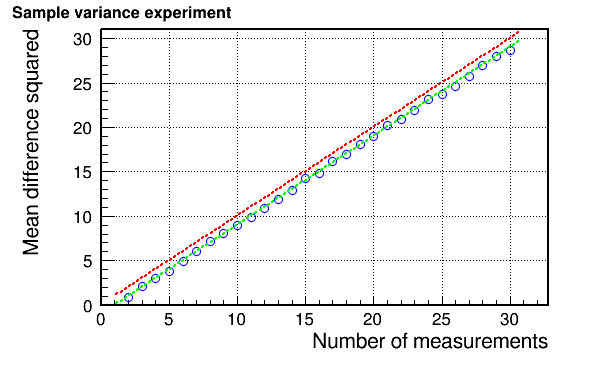

Info in <TCanvas::Print>: png file variance.png has been created


In [5]:
# Create plot canvas

cexp = TCanvas('cexp')
   
# Create result graph

rgr = TGraph(Nmax-Nmin+1,array('d',n_tab),array('d',dr2_tab))

# Set graph options

rgr.SetNameTitle("rgr","Sample variance experiment")
rgr.SetMarkerStyle(24)
rgr.SetMarkerColor(4)

rgr.GetXaxis().SetTitle("Number of measurements")
rgr.GetYaxis().SetTitle("Mean difference squared")

rgr.SetMinimum(0.)
rgr.SetMaximum(Nmax+1.)

# Plot 

rgr.Draw('AWP')

# Expected dependence

def myLin(x, par):
    return x[0]-par[0]

# Define user function

fexp=TF1("fexp",myLin,Nmin-1.,Nmax+1.,1)
fexp.SetParameter(0,0)
fexp.SetNpx(100)
fexp.SetTitle("Linear dependence")
fexp.SetLineStyle(2)
fexp.SetLineColor(2)
fexp.DrawCopy("Lsame")

fexp.SetParameter(0,1)
fexp.SetLineColor(3)
fexp.DrawCopy("Lsame")

cexp.Update()
cexp.Print('variance.png')

Image(filename='variance.png')

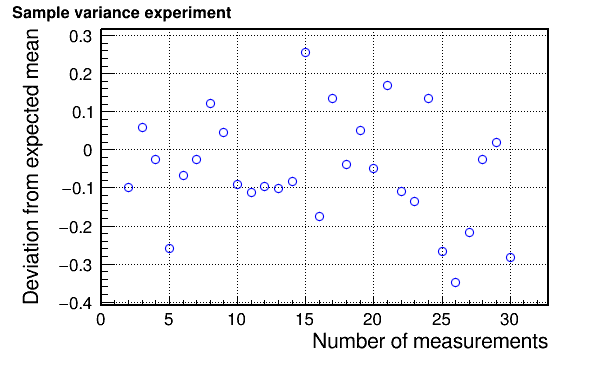

Info in <TCanvas::Print>: png file variance2.png has been created


In [6]:
# Difference between result and expected dependence

dif_tab = dr2_tab - (n_tab - 1)

# Create second plot canvas

cexp2 = TCanvas('cexp2')
   
# Create result graph

rgr2 = TGraph(Nmax-Nmin+1,array('d',n_tab),array('d',dif_tab))

# Set graph options

rgr2.SetNameTitle("rgr","Sample variance experiment")
rgr2.SetMarkerStyle(24)
rgr2.SetMarkerColor(4)

rgr2.GetXaxis().SetTitle("Number of measurements")
rgr2.GetYaxis().SetTitle("Deviation from expected mean")

# Plot 

rgr2.Draw('AWP')


cexp2.Update()
cexp2.Print('variance2.png')

Image(filename='variance2.png')